In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('bmi.csv')
data.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_clus = data.iloc[:,1:3]
data_clus.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


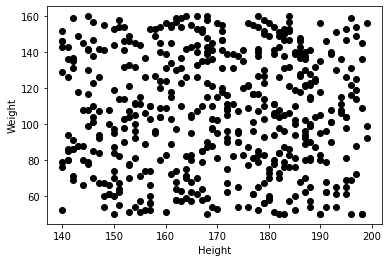

In [ ]:
plt.scatter(data.iloc[:,1],data.iloc[:,2],c='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
clus_array = np.array(data_clus)
print(clus_array)

[[174  96]
 [189  87]
 [185 110]
 [195 104]
 [149  61]
 [189 104]
 [147  92]
 [154 111]
 [174  90]
 [169 103]
 [195  81]
 [159  80]
 [192 101]
 [155  51]
 [191  79]
 [153 107]
 [157 110]
 [140 129]
 [144 145]
 [172 139]
 [157 110]
 [153 149]
 [169  97]
 [185 139]
 [172  67]
 [151  64]
 [190  95]
 [187  62]
 [163 159]
 [179 152]
 [153 121]
 [178  52]
 [195  65]
 [160 131]
 [157 153]
 [189 132]
 [197 114]
 [144  80]
 [171 152]
 [185  81]
 [175 120]
 [149 108]
 [157  56]
 [161 118]
 [182 126]
 [185  76]
 [188 122]
 [181 111]
 [161  72]
 [140 152]
 [168 135]
 [176  54]
 [163 110]
 [172 105]
 [196 116]
 [187  89]
 [172  92]
 [178 127]
 [164  70]
 [143  88]
 [191  54]
 [141 143]
 [193  54]
 [190  83]
 [175 135]
 [179 158]
 [172  96]
 [168  59]
 [164  82]
 [194 136]
 [153  51]
 [178 117]
 [141  80]
 [180  75]
 [185 100]
 [197 154]
 [165 104]
 [168  90]
 [176 122]
 [181  51]
 [164  75]
 [166 140]
 [190 105]
 [186 118]
 [168 123]
 [198  50]
 [175 141]
 [145 117]
 [159 104]
 [185 140]
 [178 154]

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(clus_array)
data_scaled

array([[0.57627119, 0.41818182],
       [0.83050847, 0.33636364],
       [0.76271186, 0.54545455],
       [0.93220339, 0.49090909],
       [0.15254237, 0.1       ],
       [0.83050847, 0.49090909],
       [0.11864407, 0.38181818],
       [0.23728814, 0.55454545],
       [0.57627119, 0.36363636],
       [0.49152542, 0.48181818],
       [0.93220339, 0.28181818],
       [0.3220339 , 0.27272727],
       [0.88135593, 0.46363636],
       [0.25423729, 0.00909091],
       [0.86440678, 0.26363636],
       [0.22033898, 0.51818182],
       [0.28813559, 0.54545455],
       [0.        , 0.71818182],
       [0.06779661, 0.86363636],
       [0.54237288, 0.80909091],
       [0.28813559, 0.54545455],
       [0.22033898, 0.9       ],
       [0.49152542, 0.42727273],
       [0.76271186, 0.80909091],
       [0.54237288, 0.15454545],
       [0.18644068, 0.12727273],
       [0.84745763, 0.40909091],
       [0.79661017, 0.10909091],
       [0.38983051, 0.99090909],
       [0.66101695, 0.92727273],
       [0.

In [ ]:
distortions = []
K = range (1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data_scaled)
  distortions.append(kmeanModel.inertia_)

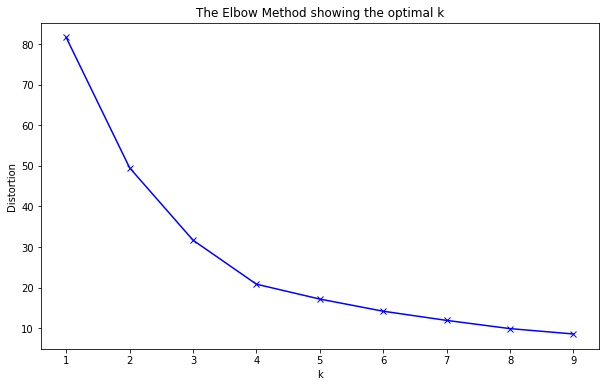

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(data_scaled)
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#        n_clusters=5, n_init=10,n_jobs=None,precompute_distances='auto',
#        random_state=None, tol=0.0001, verbose=0)
print(kmeanModel.cluster_centers_)

[[0.74702757 0.72306649]
 [0.25074395 0.26863289]
 [0.74344488 0.23923854]
 [0.28669922 0.80061633]]


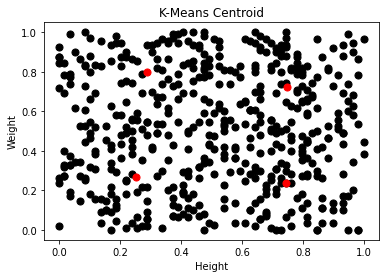

In [ ]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=50, c='black', marker='o', alpha=1)
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1, marker='o');
plt.title('K-Means Centroid')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
y_kmeans = kmeanModel.predict(data_scaled)

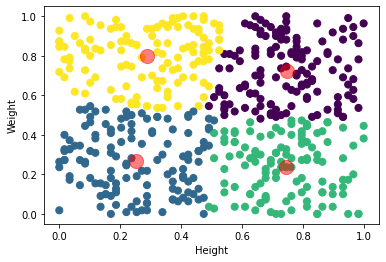

In [ ]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.5);
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
result = pd.DataFrame(data = y_kmeans)
result.columns = ['cluster']
result.head()

,cluster
0,2
1,2
2,0
3,0
4,1


In [ ]:
output = pd.concat([data,result], axis=1)
output.head

<bound method NDFrame.head of      Gender  Height  Weight  cluster
0      Male     174      96        2
1      Male     189      87        2
2    Female     185     110        0
3    Female     195     104        0
4      Male     149      61        1
..      ...     ...     ...      ...
495  Female     150     153        3
496  Female     184     121        0
497  Female     141     136        3
498    Male     150      95        1
499    Male     173     131        0

[500 rows x 4 columns]>

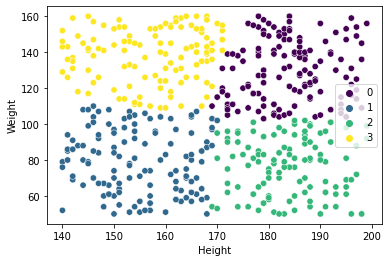

In [ ]:
import seaborn as sns
sns.scatterplot(x=output.iloc[:,1], y=output.iloc[:,2], hue=output.iloc[:,3],
                data=output, palette='viridis', s=40, legend='full');
plt.legend(loc='center right', fontsize='10');

In [ ]:
#Cluster 0
#for cluster 0 in it there are all obesity grades. 
#but the average of this cluster is obesity grade 2 which has a value between 30-40, when calculated using the BMI method. 
#even though this cluster has an above average height, they still have to lose weight to be more ideal.

In [ ]:
#Cluster 1
#for cluster 1 in it there are all obesity grades.
#but the average of this cluster is obesity grade 2 which has a value between 30-40, when calculated using the BMI method.
#this cluster must increase its height, or reduce its weight to get a more ideal body.

In [ ]:
#Cluster 2
#for cluster 2 in it there are all obesity grades.
#but the average of this cluster is obesity grade 1 which has a value between 25-30, when calculated using the BMI method.
#this cluster is the cluster closest to the ideal body, they just need to lose some weight to get the ideal body.

In [ ]:
#Cluster 3
#for cluster 2 in it there are all obesity grades.
#but the average of this cluster is morbidly obesity even super obesity which has a value more than 40, when calculated using the BMI method.
#this cluster is the worst among the others. This cluster should consult a doctor for further treatment of his weight.